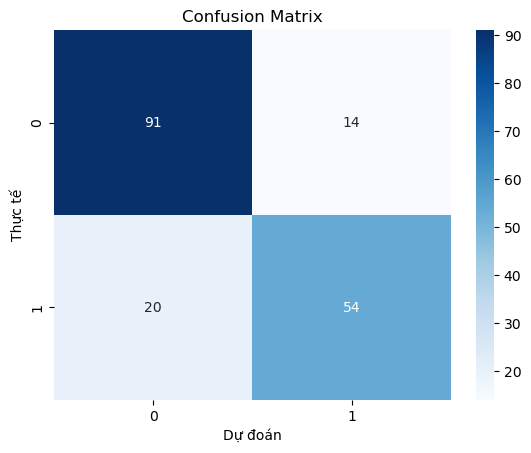

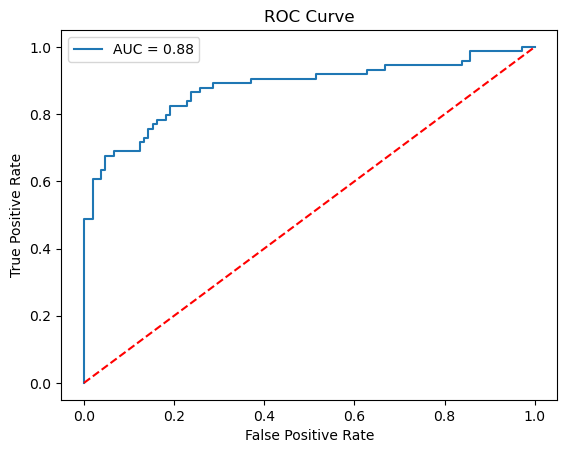

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,roc_curve,auc
import sys
import os
sys.path.append(os.path.abspath('../'))
from src.preprocess_data import load_and_preprocess_data
import joblib
loaded_model=joblib.load('../models/logistic_model.pkl')
X_train,X_val,y_train,y_val=load_and_preprocess_data()
y_pred=loaded_model.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Confusion Matrix')
plt.show()

# Biểu đồ ROC curve
y_prob = loaded_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()